### 正規分布の仮定
真の分布が正規分布でないとき、正規分布を前提とした方法が受ける影響について調べる。
#### 繰り返し測定のモデル
$n$回の測定から得られる観測値を$X_1,X_2,\cdots,X_n$とし、それらが真の値$\theta$と測定誤差$\varepsilon_i$の和として
$$
X_i=\theta+\varepsilon_i,\hspace{3mm}i=1,2,\cdots,n
$$
と表されるものとする。
統計理論において、このような形で確率分布に関係している母数を位置母数という。

この測定誤差について、次のことを仮定する。
1. $\varepsilon_1,\varepsilon_2,\cdots,\varepsilon_n$は互いに独立に同一の分布に従う確率変数である。
2. $E(\varepsilon_i)=0,\hspace{5mm}V(\varepsilon_i)=\sigma^2,\hspace{3mm}i=1,2,\cdots,n$
3. $\varepsilon_1,\varepsilon_2,\cdots,\varepsilon_n$は正規分布に従う

そのとき、次のことが成り立つ。
I. $\theta$の点推定については、標本平均を$\bar{X}=\sum X_i/n$とすると、推定量
$$
\hat{\theta}=\bar{X}
$$
は$\theta$の最小分散不偏推定量になる。
すなわち、$\theta$や$\sigma^2$の値が何であっても、$\hat{\theta}$は$\theta$の他の任意の不偏推定量より分散が小さい。
そして、その分散は$V(\hat{\theta})=\sigma^2/n$である。

II. 仮説$\theta=\theta_0$を有意水準$\alpha$で検定するためには、  
a)$\sigma^2$が既知のときには
$$
|\bar{X}-\theta_0|\geq z_{\alpha/2}\sigma / \sqrt{n}
$$
のとき仮説を棄却する。  
b)$\sigma^2$が未知のときは、不偏分散を
$$
s^2=\sum(X_i-\bar{X})^2/(n-1)
$$
として
$$
|\bar{X}-\theta_0|\geq z_{\alpha/2}(n-1)s / \sqrt{n}
$$
のとき仮説を棄却する。

III. $\theta$に対する区間推定として、信頼係数$1-\alpha$の信頼区間は、  
a)$\sigma^2$が既知のときには
$$
\bar{X}-z_{\alpha/2}\sigma / \sqrt{n}<\theta<\bar{X}+z_{\alpha/2}\sigma / \sqrt{n}
$$
b)$\sigma^2$が未知のときは、
$$
\bar{X}-t_{\alpha/2}(n-1)s / \sqrt{n}<\theta<\bar{X}+t_{\alpha/2}(n-1)s / \sqrt{n}
$$
となる。

以下では、仮定1,2が正しいものとして、3の正規分布の仮定が成り立たないとき、推測方式にどのような影響が出るかを、I,IIを中心に調べるとともに、分布の仮定にあまり影響されない推測方式について考える。

### 点推定
#### すその長い分布
仮定1,2が正しければ、明らかに
$$
E(\bar{X})=\sum E(X_i)/n=\theta,\hspace{3mm}V(\bar{X})=\sum V(X_i)/n^2=\sigma^2/n
$$
であるから、正規性の仮定が成り立たなくても標本平均$\bar{X}$は$\theta$の不偏推定量であり、その分散が$\sigma^2/n$であることに変わりはない。
$n\geq3$のとき、$\bar{X}$が最小分散になるのは、$\varepsilon_i$が正規分布に従う場合に限られ、$\varepsilon_i$の分布が正規分布でないときは、分散が$\bar{X}$より小さい不偏推定量が存在することが理論的に証明されている。

誤差$\varepsilon_i$が正規分布に従わない場合の一つの想定として、その分布が次の密度関数$f_t$を持つと仮定する。
$$
f_t(x)=\frac{1}{\pi}\frac{1}{(1+x^2)^2},\hspace{4mm}-\infty<x<\infty
$$
この分布は、自由度3の$t$分布$t(3)$を分散が1になるように標準化したものであり
$$
E(\varepsilon_i)=0,\hspace{3mm}V(\varepsilon_i)=1,\hspace{3mm}i=1,2,\cdots,n
$$
が成り立つ。
$x$が大きい部分では、分布の両端の裾の方では正規分布の方が密度関数の値がずっとはやく0に近づく。
このような現象を、この分布は正規分布よりもすそが長いと表現する。

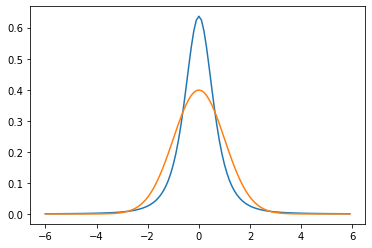

In [23]:
import numpy as np
from scipy.stats import t as t_dist
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-6,6,0.1)

ft = lambda x: 2/np.pi /(1+x**2)**2

plt.plot(x, ft(x))
plt.plot(x, norm.pdf(x))

(0.0, 0.01)

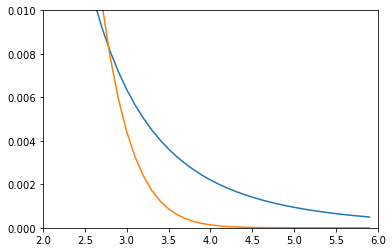

In [26]:
plt.plot(x, ft(x))
plt.plot(x, norm.pdf(x))
plt.xlim(2,6)
plt.ylim(0,0.01)

#### 最尤推定量と標本中央値
すそが長い分布については、標本平均$\bar{X}$は必ずしもよい推定量になるとは限らない。
すなわち$\hat{\theta}=\bar{X}$とすると
$$
V(\hat{\theta})=V(\bar{X})=\sigma^2/n
$$
であるが、これより分散の小さい$\theta$の不偏推定量が存在する。

観測値$X_1,\cdots,X_n$が未知母数$\theta$を含む確率分布に従うものとして、その密度関数を表す。
標本数$n$が十分大きければ、$\theta$の最尤推定量$\hat{\theta}_{ML}$はほぼ平均$\theta$、分散$1/nI(\theta)$の正規分布に従う。
ここで、
$$
\begin{align}
I(\theta)&=E_{\theta}\{\partial \log f_{\theta}(x)/\partial \theta \}^2\\
&=\int\{\partial \log f_{\theta}(x)/\partial \theta \}^2f_{\theta}(x)dx
\end{align}
$$
はフィッシャー情報量である。
誤差$\varepsilon_i$が上で示した分布の$f_t$に従うとき、$X_i$の分布は
$$
f_{\theta}(x)=f_t(x-\theta)=\frac{2}{\pi(1+(x-\theta)^2)^2}
$$
となる。
フィッシャー情報量は以下のように計算される。
$$
\frac{\partial \log f_\theta(x)}{\partial \theta}=\frac{4(x-\theta)}{1+(x-\theta)^2}
$$
となることから
$$
I(\theta)=\int_{-\infty}^{\infty}\frac{16(x-\theta)^2}{(1+(x-\theta)^2)^2}\frac{2}{\pi(1+(x-\theta)^2)^2}dx
$$
と表される。ここで、$x-\theta$を改めて$x$とおいて整理すると
$$
\begin{align}
I(\theta)&=\frac{32}{\pi}\int_{-\infty}^{\infty}\frac{x^2}{(1+x^2)^4}dx\\
&=\frac{32}{\pi}\bigg\{\int_{-\infty}^{\infty}\frac{1}{(1+x^2)^3}dx-\int_{-\infty}^{\infty}\frac{1}{(1+x^2)^4}dx \bigg\}\\
&=\frac{32}{\pi}\bigg(\frac{3\pi}{8}-\frac{5\pi}{16} \bigg)=2
\end{align}
$$
が得られる。
従って$n$が大きいとき、$V(\hat{\theta}_{ML})\fallingdotseq 1/(2n)$となる。
これは$V(\bar{X})=1/n$のほぼ$1/2$となっている。

この場合の最尤推定量は次のようにして求められる。
最尤推定量$\hat{\theta}_{ML}$の満たすべき方程式は
$$
\frac{\partial}{\partial \theta}\bigg\{\sum_i\log f_\theta(x_i) \bigg\}=0
$$
と書かれるが、これは
$$
\sum_i\frac{x_i-\theta}{1+(x_i-\theta)^2}=0
$$
に帰着する。
解$\theta$は直接得られないので、逐次近似によって求めることができる。
$$
W_i=\frac{1}{1+(x_i-\theta)^2},\hspace{3mm}i=1,2,\cdots,n
$$
とおくと、問題の式は
$$
\sum W_i(x_i-\theta)=0
$$
したがって、
$$
\theta=\frac{\sum W_ix_i}{\sum W_i}
$$
と表される。そこで、最初の近似解$\theta^{(0)}$を用いて
$$
W_i^{(0)}=\frac{1}{1+(x_i-\theta^{(0)})^2},\hspace{3mm}i=1,2,\cdots,n
$$
とおき、
$$
\theta^{(1)}=\frac{\sum W_i^{(0)}x_i}{\sum W_i^{(0)}}
$$
を新しい近似解とする。

観測値の分布が対称であれば、母平均$\theta$は母中央値でもあるので、$\theta$の推定に標本中央値を用いることができる。
そこで、観測値$X_1,\cdots,X_n$を大きさの順に並べた順序統計量を
$$
X_{(1)}\leq X_{(2)} \leq \cdots \leq X_{(n)}
$$
で表すとすと、標本中央値は
$$
X_{med}=
\left\{\begin{array}{ll}
X_{((n+1)/2)}&nが奇数\\
(X_{(n/2)}+X_{((n/2)+1)})/2&nが偶数
\end{array}\right.
$$
で与えられる。
一般に標本中央値の$n$が大きいときの標本分布については、次の定理が知られている。
観測値$X_1,\cdots,X_n$の分布を$g(x)$とするとき、$n$が大きければ、$X_{med}$は平均が母中央値$\theta$、分散が$1/4n\{g(\theta)\}^2$の正規分布
$$
N\bigg(\theta, \frac{1}{4n\{g(\theta)\}^2} \bigg)
$$
にほぼ従う。

誤差分布が$f_t(x)$であれば、$g(x)=f_t(x-\theta)$であり、母中央値は$x=\theta$となるので、標本中央値の分散は
$$
V(X_{med})\fallingdotseq 1/4n\{f_t(0)\}^2=\pi^2/16n=0.617/n
$$
となって、標本平均の$1/n$よりも小さくなる。

#### ロバストな推定量
誤差が正規分布から大きく離れている場合には、$\bar{X}$の分散は最も良い推定量の分散に比べて著しく大きくなる危険性がある。
また、そのような場合には$X_{med}$の方が分散が小さくなる。
そこで、正規分布のもとでも$X_{med}$より分散が小さく、しかも大きな誤差の影響を受けにくいような推定量が望ましいことになる。

##### トリム平均
順序統計量の大きい方と小さい方からそれぞれ$k$個ずつ除いて、残りの$(n-2k)$個の値を平均したもの
$$
\hat{\theta}_{trim}(k)=\frac{1}{n-2k}(X_{(k+1)}+\cdots+X_{(n-k)})
$$
をトリム平均という。
トリム平均は正規分布のもとでも$\bar{X}$より著しく分散が大きくなることがなく、正規分布から著しく離れた分布の下でも分散があまり大きくならないことが知られている。トリム平均は分布の形に対してロバストであるという。

##### フーバー型推定量
$[y]$を$y$を超えない最大の整数として、
$$
s=([n/2]+1)/2
$$
とするとき
$$
d=X_{(n-s+1)}-X_{(s)}
$$
を四分位範囲と呼ぶ。ただし、$s$に0.5の端数がでるときの$X_{(s)}$は$X_{(s-0.5)}$と$X_{(s+0.5)}$の平均を意味するものとする。
さらに、
$$
c=0.5d
$$
として
$$
[X_{med}-c,X_{med}+c]
$$
の範囲にある観測値の個数を$m$、その合計を$S$、さらに
$$
m_U=X_{med}+cより大きい観測値の個数\\
m_L=X_{med}-cより小さい観測値の個数
$$
として
$$
\hat{\theta}_H=\{S+c(m_U-m_L) \} / m
$$
をフーバー型推定量という。

### 仮説検定
#### t検定のロバストネス
平均$\theta$、分散$\sigma^2$の正規分布に従う観測値$X_1,\cdots,X_n$に基づき、仮説$\theta=\theta_0$を有意水準$\alpha$で検定する場合、$\sigma^2$が未知のときは$t$検定が用いられる。すなわち、不偏分散を$s^2$として
$$
t=\sqrt{n}|\bar{X}-\theta_0|/s
$$
を計算し
$$
|t|>t_{\alpha/2}(n-1)
$$
のとき仮説を棄却する。

##### 分布の形
いま、正規分布の仮定が正しくなく、$X_1,\cdots,X_n$が平均$\theta$、分散$\sigma^2$の正規分布ではない分布に従うとき、仮説$\theta=\theta_0$のもとでの$t$分布がどうなるか考える。
$n$がある程度大きければ、中心極限定理により$\bar{X}$はほぼ平均$\theta$、分散$\sigma^2/n$の正規分布に従う。
また、大数の法則により$s^2$はほぼ$\sigma^2$に、また$s$はほぼ$\sigma$に等しくなる。
したがって、$t$の分布は仮説$\theta=\theta_0$のもとでほぼ平均0、分散1の正規分布になると考えられる。
他方、自由度が大きいときの$t$分布はほぼ正規分布に一致するから、上の$t$の分布は大体$t$分布で近似できると考えてよい。

したがって、正規分布の仮定が成り立たなくても、$t$検定を用いれば、誤って正しい仮説を棄却する確率は$\alpha$を大きく超えることはないと考えてよい。つまり、$t$検定を用いても結論の妥当性は失われない。

#### 検出力
検出力に関しては$t$検定はロバストでない。
$\sigma^2=1$と仮定してよい。正規分布の仮定のもとでの検定方式は、有意水準を$\alpha$とすれば、
$$
|\bar{X}-\theta_0|\geq z_{\alpha/2}/\sqrt{n}
$$
のときの仮説を棄却することになる。
これに対し、正規分布の仮定が成り立たず、誤差分布の密度関数が
$$
f_t(x)=\frac{1}{\pi}\frac{1}{(1+x^2)^2},\hspace{4mm}-\infty<x<\infty
$$
であるとする。
このときの$\theta$の推定量$\hat{\theta}_{ML}$は、$n$が大きいとき、平均$\theta$、分散$1/nI(\theta)$の正規分布にほぼ従うものと考えていよいから、$\hat{\theta}_{ML}$を標準化すればわかるように
$$
|\hat{\theta}_{ML}-\theta_0|\geq z_{\alpha/2}/\sqrt{nI(\theta)}
$$
のとき仮説を棄却することにすれば、近似的な有意水準$\alpha$の検定方式となる。
中心極限定理によれば、
$$
P(|\bar{X}-\theta_0|\geq z_{\alpha/2}/\sqrt{n})\fallingdotseq \alpha
$$
なので、$\bar{X}$を用いる検定もほぼ正しい結論を与える。

対立仮説$\theta=\theta_1(\theta_1\neq\theta_0)$のもとでは、$\hat{\theta}_{ML},\bar{X}$はほぼ平均$\theta_1$、分散がそれぞれ$1/nI(\theta),1/n$の正規分布に従うものとみなしてよい。
したがって、
$$
|\bar{X}-\theta_0|\geq z_{\alpha/2}\sigma / \sqrt{n}
$$
の検出力は帰無仮説からのずれを
$$
\delta=\theta_1-\theta_0
$$
として、
$$
\begin{align}
&P(\sqrt{n}|\bar{X}-\theta_0|\geq z_{\alpha/2})\\
&=P(\sqrt{n}(\bar{X}-\theta_0)\leq -z_{\alpha/2})またはP(\sqrt{n}(\bar{X}-\theta_0)\geq z_{\alpha/2})\\
&=P(\sqrt{n}(\bar{X}-\theta_0)\leq -z_{\alpha/2}-\sqrt{n}\delta)+P(\sqrt{n}(\bar{X}-\theta_0)\geq +z_{\alpha/2}-\sqrt{n}\delta)\\
&=\Phi(-z_{\alpha/2}-\sqrt{n}\delta)+1-\Phi(z_{\alpha/2}-\sqrt{n}\delta)
\end{align}
$$
となる。
同様に、
$$
|\hat{\theta}_{ML}-\theta_0|\geq z_{\alpha/2}/\sqrt{nI(\theta)}
$$
の検出力は
$$
P(\sqrt{nI(\theta)}|\bar{X}-\theta_0|\geq z_{\alpha/2})=\Phi(-z_{\alpha/2}-\sqrt{nI(\theta)}\delta)+1-\Phi(z_{\alpha/2}-\sqrt{nI(\theta)}\delta)
$$
となる。

#### ノンパラメトリック検定
誤差分布が原点について対称であると仮定できるときは、$\theta$が$X_i$の分布の中央値になるので、以下のようにして仮説$\theta=0$を検定できる。
$$
p=P(X_i\geq 0)
$$
とすると、仮説$\theta=0$は$p=1/2$と同等になる。そして、
$$
N=\{X_1,\cdots,X_nのうち、$X_i\geq0$のものの個数 \}
$$
とすると、$N$は二項分布$Bi(n,p)$に従う、したがって、$p=1/2$のとき
$$
P(|N-n/2|\geq c)=\alpha
$$
となるように定数$c$を定め、$|N-n/2|\geq c$のとき仮説を棄却することにすれば、有意水準$\alpha$の検定方式が得られる。

In [31]:
import math

n =17
nCy = lambda x: math.factorial(n)/math.factorial(x)/math.factorial(n-x)

p_lower = np.sum([nCy(i) for i in range(5)]) / 2**17
print(p_lower)

# N <= 4 または N >= 13を棄却域とする
alpha = p_lower*2
print(alpha)

0.0245208740234375
0.049041748046875


$N$の取り得る値が離散的であるため、正確に$\alpha$に等しくなるように棄却域を決めることは一般にはできない。
このように分布の形に関係なく妥当な結論を与えるような検定方式をノンパラメトリック検定という。
上に述べた検定方式は、観測値の符号のみに注目して結論を導くので一般に符号検定と呼ぶ。

##### ノンパラメトリック検定の検出力
ノンパラメトリック検定は、分布の形が正確に分かっているときにはパラメトリック検定よりも検出力が劣る。
しかし、分布の形が分からないとき、検出力に関してロバストということも少なくない。

誤差分布が
$$
f_t(x)=\frac{1}{\pi}\frac{1}{(1+x^2)^2},\hspace{4mm}-\infty<x<\infty
$$
のとき、$\bar{X}$を用いて仮説$\theta=0$を有意水準5%で検定する場合、標本数$n=17$、対立仮説が$\theta=0.6$のときの検出力は0.696である。
一方符号検定の検出力は真の分布に依存する。真の分布が正規分布ならば、$p=0.6$のときの$p$の値は
$$
p=P(X_i\geq0)=P(X_i-0.6\geq -0.6)=1-\Phi(-0.6)=0.7257
$$
となる。$n=17$のときの符号検定の有意水準5%の棄却域は、$N\leq4$または$N\geq13$である。したがって、この場合の検出力は、$N$が二項分布$Bi(17,0.7257)$に従うときの
$$
P(N\leq4)+P(N\geq 13)=0.000+0.482=0.482
$$
となる。この値は$\bar{X}$を用いたときの検出力$0.696$より小さい。
これに対し、真の分布が$f_t$ならば
$$
\begin{align}
p&=P(X_i\geq0)=P(X_i-0.6\geq -0.6)\\
&=\int_{-0.6}^{\infty}\frac{2dx}{\pi(1+x^2)^2}=\frac{1}{\pi}\bigg[\bigg(\frac{x}{1+x^2}+\tan^{-1}x  \bigg)\bigg]_{-0.6}^\infty\\
&=\frac{1}{2}+\frac{1}{\pi}(0.4412+0.5404)=0.8125
\end{align}
$$
となる。したがって、この場合の検出力は、$N$が二項分布$Bi(17,0.8125)$に従うことから
$$
P(N\leq4)+P(N\geq 13)=0.000+0.799=0.799
$$
となる。この値は$\bar{X}$を用いたときの検出力$0.696$より大きい。

##### 2標本問題のノンパラメトリック検定
第1標本$X_1,\cdots,X_m$が互いに独立に確率密度関数$f(x)$を持つ連続分布に従い、第2標本$Y_1,\cdots,Y_n$が互いに独立に密度関数$g(x)$をもつ連続分布に従うものとする。このとき、2つの分布が等しいという仮説
$$
H_0:f(x)=g(x)
$$
を検定することを考える。ただし、$f(x),g(x)$の形については何も仮定しないものとする。
いま、$X_1,\cdots,X_m,Y_1,\cdots,Y_n$を一緒にして小さいものから順に並べて、$1$から$M=m+n$まで順位をつけ、その中で$X_1,\cdots,X_m$の順位を$R_1,\cdots,R_m$とする。これを$X$の併合順位という。

仮説$f(x)$が正しければ、$X_1,\cdots,X_m,Y_1,\cdots,Y_n$はすべて同一の分布に従うから、$R_1,\cdots,R_m$が$\{1,\cdots,M\}$の中の任意の$m$個の数$r_1,\cdots,r_m$を取る確率はすべて等しく
$$
P(R_1=r_1,\cdots,R_m=r_m)=\frac{1}{M(M-1)\cdots(M-m+1)}
$$
となる。そこで、検定統計量として、第1標本の順位和
$$
W=\sum R_i
$$
を考えると、仮説のもとで$P(W=w)$となる確率は分布の形に無関係に計算することができる。
仮説のもとで
$$
P(W\leq c_1)+P(W\geq c_2)=\alpha
$$
となるように$c_1,c_2$を定め、$W\leq c_1$または$W\geq c_2$のときに仮説を棄却することにすれば、有意水準$\alpha$の検定方式が得られる。
これを順位和検定(ウィルコクソン検定、あるいはマン-ホイットニー検定)と呼ばれる。
あまり大きくない$m,n$に関しては数表が作られている。
$m,n$がある程度大きければ、仮説が正しいときの$W$が、平均と分散がそれぞれ
$$
E(W)=m(M+1)/2,\hspace{3mm}V(W)=mn(M+1)/12
$$
の正規分布にほぼ従うことが知られているから
$$
\bigg| W-\frac{m(M+1)}{2}\bigg|\geq z_{\alpha/2}\sqrt{\frac{mn(M+1)}{12}}
$$
のとき仮説を棄却することにすればよい。

### 正規分布の仮定のチェック
#### 正規性の検定
観測値$X_1,\cdots,X_n$に基づいて、仮説
$$
H_0:X_1,\cdots,X_nは正規分布に従う
$$
を検定するのが正規性の検定であり、その方法はいくつか提案されている。
一般に確率密度関数$f(x)$を持つ分布の平均を
$$
\mu=\int_{-\infty}^{\infty}xf(x)dx
$$
とするとき
$$
\mu_r'=\int_{-\infty}^{\infty}(x-\mu)^rf(x)dx
$$
をこの分布の平均の周りの、$r$次のモーメントと呼ぶ。
分布$f(x)$が平均に関して対称のときは$\mu_3'=0$だから、これを$\sigma^3$で割って無次元の量にした
$$
\beta_1=\mu_3'/\sigma^3
$$
を分布の非対称性の指標とすることができ、これを歪度と呼ぶ。
同様に、$\mu_4'/\sigma^4$は分布のすその長さとモード周辺の尖り方を表すが、正規分布では$\mu_4'/\sigma^4=3$となることから、
$$
\beta_2=\mu_4'/\sigma^4-3
$$
をすその長さの指標として、尖度と呼ぶ。
平均の周りの標本$r$次モーメントを
$$
m_r'=\sum(X_i-\bar{X})^r/n
$$
とすると標本歪度と標本尖度は
$$
\begin{align}
b_1&=m_3'/(m_2')^{3/2}\\
b_2&=m_4'/(m_2')^{2}-3
\end{align}
$$
と定義される。
観測値の分布が正規分布の場合は$b_1,b_2$の期待値はほぼ0となるから、それらの絶対値が大きいとき、正規性の仮説を棄却すればよい。
$n$がある程度大きいとき、$b_1,b_2$はほぼ分散$6/n,24/n$の正規分布に従うものとみなすことができる。

#### 正規確率プロットによるチェック
観測値$X_1,\cdots,X_n$が正規分布$N(\mu,\sigma^2)$に従う場合、$Z_i=(X_i-\mu)/\sigma$の分布は標準正規分布になるので、
$X_i$が特定の値$x$以下になる確率$p_x$は、累積分布関数$\Phi(z)$を用いて
$$
p_x=\Phi\bigg(\frac{x-\mu}{\sigma} \bigg)
$$
と表され、これは$\Phi$の逆関数を$\Phi^{-1}$とすると
$$
\Phi^{-1}(p_x)=\frac{x-\mu}{\sigma}
$$
と同等である。$\Phi^{-1}(p_x)$が$x$の1次式になることを示す。
そこで、観測値の大きさ順に並べた順序統計量を
$$
X_{(1)}\leq X_{(2)}\leq\cdots\leq X_{(n)}
$$
とし、グラフ用紙に
$$
(X_{(i)},z_i),\hspace{5mm}z_i=\Phi^{-1}(i/(n+1)),\hspace{3mm}i=1,2,\cdots,n
$$
をプロットすれば、正規分布の仮定が正しいときの打点はほぼ直線的になることが期待される。
これが正規確率プロットである。